In [37]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [38]:
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month
df_DA_US_explode = df_DA_US.explode('job_skills')

In [39]:
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

df_DA_US_pivot = df_DA_US_pivot.drop('Total')



In [53]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size()
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis=0)

In [54]:
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month_no'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.set_index('job_posted_month_no')
df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


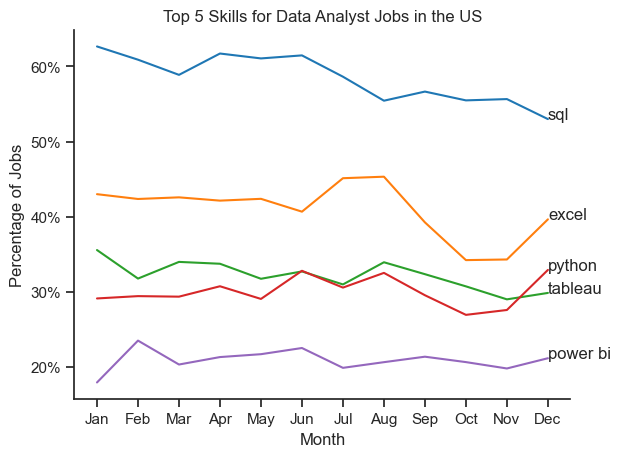

In [62]:
df_plot = df_DA_US_percent.iloc[:, :5]

sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Top 5 Skills for Data Analyst Jobs in the US')
plt.ylabel('Percentage of Jobs')
plt.xlabel('Month')
plt.legend().remove()

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}%'))

for i in range(5):
    plt.text(11, df_plot.iloc[-1, i], df_plot.columns[i],)

plt.show()

